In [1]:
import torch

In [1]:
import pandas as pd
import os

In [3]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 76.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 35.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [8]:
os.listdir('./data')

['customers.csv',
 '.DS_Store',
 'images',
 'articles.csv',
 'transactions_train.csv',
 'sample_submission.csv']

In [3]:
customers = pd.read_csv("./data/customers.csv")

In [4]:
articles = pd.read_csv("./data/articles.csv")

In [20]:
transactions = pd.read_csv("./data/transactions_train.csv")

In [21]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [2]:
submission = pd.read_csv("./data/sample_submission.csv")

In [5]:
submission.prediction[0]

'0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001'

In [14]:
submission_users = set(list(submission['customer_id']))

In [22]:
transaction_users = set(list(transactions['customer_id']))

In [28]:
intersect_user = set()
for u in submission_users:
    if u in transaction_users:
        intersect_user.add(u)
    

In [29]:
len(intersect_user), len(submission_users), len(transaction_users)

(1362281, 1371980, 1362281)

In [34]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [35]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

# Articles Categorical

In [5]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [6]:
import pandas as pd

cols_to_encode = [col for col in articles.columns if col.endswith('_no')]

# Use pd.get_dummies to one-hot encode these columns
articles_encoded = pd.get_dummies(articles, columns=cols_to_encode, prefix=cols_to_encode)

print(articles_encoded.head())

   article_id  product_code          prod_name product_type_name  \
0   108775015        108775          Strap top          Vest top   
1   108775044        108775          Strap top          Vest top   
2   108775051        108775      Strap top (1)          Vest top   
3   110065001        110065  OP T-shirt (Idro)               Bra   
4   110065002        110065  OP T-shirt (Idro)               Bra   

   product_group_name graphical_appearance_name  colour_group_code  \
0  Garment Upper body                     Solid                  9   
1  Garment Upper body                     Solid                 10   
2  Garment Upper body                    Stripe                 11   
3           Underwear                     Solid                  9   
4           Underwear                     Solid                 10   

  colour_group_name  perceived_colour_value_id perceived_colour_value_name  \
0             Black                          4                        Dark   
1             

In [7]:
# Select columns that contain '_no' in their names
columns_with_no = [col for col in articles_encoded.columns if '_no' in col]

# Create a new DataFrame with only those columns
articles_categorical = articles_encoded[columns_with_no]

In [8]:
articles_categorical.index = articles_encoded['article_id']

# Users Categorical

In [9]:
cols_to_encode = ['Active', 'FN', 'club_member_status', 'fashion_news_frequency']

In [10]:
customers_encoded = pd.DataFrame()
mapping_dict = {}
for col in cols_to_encode:
    # 1. Find unique values
    unique_vals = customers[col].unique()
    
    # 2. Create a mapping dictionary (value -> integer code)
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    mapping_dict[col] = mapping
    print(f"Mapping for '{col}': {mapping}")
    
    # 3. Map the original column to integer codes
    code_col = col + '_code'
    customers[code_col] = customers[col].map(mapping)
    
    # 4. One-hot encode the integer codes
    dummies = pd.get_dummies(customers[code_col], prefix=col)
    
    # Concatenate the dummy variables back into the DataFrame
    customers_encoded = pd.concat([customers_encoded, dummies], axis=1)

print("\nDataFrame after one-hot encoding:")
print(customers_encoded)

Mapping for 'Active': {np.float64(nan): 0, np.float64(1.0): 1}
Mapping for 'FN': {np.float64(nan): 0, np.float64(1.0): 1}
Mapping for 'club_member_status': {'ACTIVE': 0, nan: 1, 'PRE-CREATE': 2, 'LEFT CLUB': 3}
Mapping for 'fashion_news_frequency': {'NONE': 0, 'Regularly': 1, nan: 2, 'Monthly': 3}

DataFrame after one-hot encoding:
         Active_0  Active_1   FN_0   FN_1  club_member_status_0  \
0            True     False   True  False                  True   
1            True     False   True  False                  True   
2            True     False   True  False                  True   
3            True     False   True  False                  True   
4           False      True  False   True                  True   
...           ...       ...    ...    ...                   ...   
1371975      True     False   True  False                  True   
1371976      True     False   True  False                  True   
1371977     False      True  False   True                  True

In [11]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3
0,True,False,True,False,True,False,False,False,True,False,False,False
1,True,False,True,False,True,False,False,False,True,False,False,False
2,True,False,True,False,True,False,False,False,True,False,False,False
3,True,False,True,False,True,False,False,False,True,False,False,False
4,False,True,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1371975,True,False,True,False,True,False,False,False,True,False,False,False
1371976,True,False,True,False,True,False,False,False,True,False,False,False
1371977,False,True,False,True,True,False,False,False,False,True,False,False
1371978,False,True,False,True,True,False,False,False,False,True,False,False


In [12]:
customers.age /= 100

In [13]:
customers_encoded = pd.concat([customers_encoded, customers[['age']]], axis=1)

In [14]:
customers_encoded.index = customers['customer_id']

In [15]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3,age
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,True,False,True,False,True,False,False,False,True,False,False,False,0.49
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,True,False,True,False,True,False,False,False,True,False,False,False,0.25
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,True,False,True,False,True,False,False,False,True,False,False,False,0.24
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,True,False,True,False,True,False,False,False,True,False,False,False,0.54
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,False,True,False,True,True,False,False,False,False,True,False,False,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,True,False,True,False,True,False,False,False,True,False,False,False,0.24
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,True,False,True,False,True,False,False,False,True,False,False,False,0.21
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,False,True,False,True,True,False,False,False,False,True,False,False,0.21


# Training Data

In [83]:

# Convert all boolean columns to floats in both DataFrames
for df in [customers_encoded, articles_categorical]:
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(float)

/var/folders/pv/1ypdzppd02x4038ctfz2fnkr0000gn/T/ipykernel_86458/1207431484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bool_cols] = df[bool_cols].astype(float)


In [84]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3,age
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.49
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.25
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.24
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.54
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.24
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.21
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.21


In [85]:
articles_categorical

,product_type_no_-1,product_type_no_49,product_type_no_57,product_type_no_59,product_type_no_60,product_type_no_66,product_type_no_67,product_type_no_68,product_type_no_69,product_type_no_70,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108775044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108775051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110065001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
110065002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953450001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
953763001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956217002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [93]:
positive_labels = transactions[['customer_id', 'article_id']]
positive_labels['label'] = 1.0

/var/folders/pv/1ypdzppd02x4038ctfz2fnkr0000gn/T/ipykernel_86458/2595892956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_labels['label'] = 1.0


In [104]:
positive_labels

,customer_id,article_id,label
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,1.0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,1.0
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,1.0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,1.0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,1.0
...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,1.0
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,1.0
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,1.0
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,1.0


In [106]:
customer_positive = positive_labels.groupby('customer_id')['article_id'].apply(set)

In [1]:
assert False
# Define the helper function that will sample a negative article for a row.
def sample_negative_for_row(row):
    customer = row['customer_id']
    pos_set = customer_positive.get(customer, set())
    
    # Start by sampling a candidate from the entire articles list.
    candidate = np.random.choice(articles['article_id'])
    
    # Iterate until the candidate is not in the customer's positive set.
    while candidate in pos_set:
        candidate = np.random.choice(articles['article_id'])
    
    # Increment our counter and print progress every 1,000 rows.
    sample_negative_for_row.counter += 1
    if sample_negative_for_row.counter % 1000 == 0:
        print(f"Processed {sample_negative_for_row.counter} rows")
    
    return candidate

# Initialize a counter attribute on the function.
sample_negative_for_row.counter = 0

print("\nStep 2: Generating negative samples for each positive interaction using .apply...")
# For each row in positive_labels, sample a negative article that is not in the customer's positive set.
positive_labels['negative_article'] = positive_labels.apply(sample_negative_for_row, axis=1)


AssertionError: 

In [113]:
positive_labels.to_csv("./data/negative_labels_temp.csv")

In [116]:
# Step 1: Create a new DataFrame for negative samples
negative_labels = positive_labels[['customer_id', 'negative_article']].copy()
negative_labels.rename(columns={'negative_article': 'article_id'}, inplace=True)
negative_labels['label'] = 0.0

# Step 2: Concatenate positive and negative labels into one DataFrame
full_labels = pd.concat([positive_labels[['customer_id', 'article_id', 'label']], negative_labels], ignore_index=True)


In [118]:
full_labels.to_csv("./data/full_training_labels.csv")

In [119]:
training_data = full_labels.sample(frac=1, random_state=42).reset_index(drop=True)


In [133]:
full_training_data = training_data

In [122]:
training_data_small = training_data.sample(frac=0.001, random_state=42).reset_index(drop=True)

In [123]:
training_data_medium = training_data.sample(frac=0.01, random_state=42).reset_index(drop=True)

In [124]:
training_data_large = training_data.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [125]:
len(training_data_small), len(training_data_medium), len(training_data_large)

(63577, 635766, 6357665)

In [134]:
# Perform a left join
training_data = training_data_small.merge(customers_encoded, on="customer_id", how="left")


In [136]:
training_data = training_data.merge(articles_categorical, on="article_id", how="left")

In [140]:
training_data[['label']]

,label
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
63572,0.0
63573,0.0
63574,1.0
63575,1.0


# TTSN model

In [144]:
customers_encoded.columns, len(customers_encoded.columns)

(Index(['Active_0', 'Active_1', 'FN_0', 'FN_1', 'club_member_status_0',
        'club_member_status_1', 'club_member_status_2', 'club_member_status_3',
        'fashion_news_frequency_0', 'fashion_news_frequency_1',
        'fashion_news_frequency_2', 'fashion_news_frequency_3', 'age'],
       dtype='object'),
 13)

In [145]:
articles_categorical.columns, len(articles_categorical.columns)

(Index(['product_type_no_-1', 'product_type_no_49', 'product_type_no_57',
        'product_type_no_59', 'product_type_no_60', 'product_type_no_66',
        'product_type_no_67', 'product_type_no_68', 'product_type_no_69',
        'product_type_no_70',
        ...
        'garment_group_no_1013', 'garment_group_no_1014',
        'garment_group_no_1016', 'garment_group_no_1017',
        'garment_group_no_1018', 'garment_group_no_1019',
        'garment_group_no_1020', 'garment_group_no_1021',
        'garment_group_no_1023', 'garment_group_no_1025'],
       dtype='object', length=544),
 544)

In [155]:
training_data

,customer_id,article_id,label,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
0,557716a29afd925a80a972134bf6f63fb24943ed1cd33e...,786743001,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0593e4164603ee9830dc1ed4a7a3cfd5abecaf4424ddc...,615141002,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b303d0055cc805086fa0022a6c61cb0e61a24376c14a6c...,666735001,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f1f74b264240aa024a924a0edffd61908df2825b84f3c1...,911301001,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5d187c87e7dc44bc4c4e701da03147773a937c6db7eaa5...,685811005,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63572,34a06771f1dce07e64e1f060ae2da8c8e8c1195e92f302...,784205017,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63573,8152391b87fb0ab57067313fa8f8caf93209fd4b1c58b9...,766785003,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63574,207968eccc78b3baf8fe11908919ae4ff33085758d4c6c...,745232001,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63575,3fa0c831468d26d0f479fb0d5dc7540877713d80c97293...,399136061,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
import torch
from torch.utils.data import Dataset, DataLoader

class RecommendationDataset(Dataset):
    def __init__(self, customer_features, article_features, labels):
        """
        Args:
            customer_features (Tensor): shape [num_samples, 13]
            article_features (Tensor): shape [num_samples, 500]
            labels (Tensor): shape [num_samples] (e.g., implicit or explicit feedback)
        """
        self.customer_features = customer_features
        self.article_features = article_features
        self.labels = labels

    def __len__(self):
        return len(self.customer_features)

    def __getitem__(self, idx):
        return (self.customer_features.iloc[idx].values,
                self.article_features.iloc[idx].values,
                self.labels.iloc[idx].values)

def customer_training_data_preparation(customers_encoded):
    return customers_encoded.astype('float32').fillna(0.0)

def article_training_data_preparation(articles_categorical):
    return articles_categorical.astype('float32').fillna(0.0)
    
# Create the dataset and then a DataLoader
dataset = RecommendationDataset(
    customer_training_data_preparation(training_data[customers_encoded.columns]).reset_index(drop=True), 
    article_training_data_preparation(training_data[articles_categorical.columns]).reset_index(drop=True), 
    training_data[['label']].reset_index(drop=True).astype('float32').fillna(0.0))
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

NameError: name 'training_data' is not defined

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

class TwoTowerRecommender(nn.Module):
    def __init__(self, customer_input_dim=13, article_input_dim=500, embedding_dim=32):
        super(TwoTowerRecommender, self).__init__()
        # Customer tower: small MLP for 13 features.
        self.customer_tower = nn.Sequential(
            nn.Linear(customer_input_dim, 254),
            nn.ReLU(),
            nn.Linear(254, 254),
            nn.ReLU(),
            nn.Linear(254, embedding_dim)
        )
        
        # Article tower: deeper MLP for 500 features.
        self.article_tower = nn.Sequential(
            nn.Linear(article_input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, embedding_dim)
        )
    
    def forward(self, customer_features, article_features):
        customer_emb = self.customer_tower(customer_features)   # [batch, embedding_dim]
        article_emb = self.article_tower(article_features)        # [batch, embedding_dim]
        
        # Compute similarity, e.g., dot product.
        logits = (customer_emb * article_emb).sum(dim=1)
        probabilities = torch.sigmoid(logits)
        return probabilities 

model = TwoTowerRecommender(customer_input_dim=13, article_input_dim=544, embedding_dim=32)
criterion = nn.BCELoss()  # Binary cross-entropy loss for probability inputs
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [207]:
batch_idx, (customer_features, article_features, labels) = next(enumerate(data_loader))

In [208]:
customer_features, article_features, labels

(tensor([[1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.4600],
         [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          1.0000, 0.0000, 0.0000, 0.2500],
         [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          1.0000, 0.0000, 0.0000, 0.3600],
         [1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.3000],
         [1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.1700],
         [1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.5400],
         [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          1.0000, 0.0000, 0.0000, 0.5200],
         [1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.5000],


In [209]:
outputs = model(customer_features, article_features)

In [210]:
outputs

tensor([0.5000, 0.5005, 0.5004, 0.4995, 0.5002, 0.4998, 0.4997, 0.4998, 0.5001,
        0.5002, 0.5005, 0.4998, 0.4994, 0.5002, 0.5001, 0.4997, 0.5006, 0.5003,
        0.5003, 0.5001, 0.5002, 0.4998, 0.4991, 0.5005, 0.5002, 0.5005, 0.5000,
        0.5002, 0.5003, 0.5007, 0.5003, 0.5002], grad_fn=<SigmoidBackward0>)

In [213]:
training_loss = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for batch_idx, (customer_features, article_features, labels) in enumerate(data_loader):
        # Move data to GPU if available
        if torch.cuda.is_available():
            customer_features = customer_features.cuda()
            article_features = article_features.cuda()
            labels = labels.cuda()
            model = model.cuda()

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(customer_features, article_features)

        # Compute the loss
        loss = criterion(outputs, labels.float().view(-1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track the loss
        running_loss += loss.item()

        # Print progress every 100 batches
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(data_loader)}], Loss: {loss.item():.4f}")
            training_loss.append(loss.item())

    # Print epoch loss
    print(f"Epoch [{epoch+1}/{num_epochs}] - Average Loss: {running_loss / len(data_loader):.4f}")

Epoch [1/20], Step [0/1987], Loss: 0.6928
Epoch [1/20], Step [100/1987], Loss: 0.6910
Epoch [1/20], Step [200/1987], Loss: 0.6821
Epoch [1/20], Step [300/1987], Loss: 0.6006
Epoch [1/20], Step [400/1987], Loss: 0.6926
Epoch [1/20], Step [500/1987], Loss: 0.6021
Epoch [1/20], Step [600/1987], Loss: 0.6100
Epoch [1/20], Step [700/1987], Loss: 0.6214
Epoch [1/20], Step [800/1987], Loss: 0.4945
Epoch [1/20], Step [900/1987], Loss: 0.5450
Epoch [1/20], Step [1000/1987], Loss: 0.6382
Epoch [1/20], Step [1100/1987], Loss: 0.6036
Epoch [1/20], Step [1200/1987], Loss: 0.6710
Epoch [1/20], Step [1300/1987], Loss: 0.4382
Epoch [1/20], Step [1400/1987], Loss: 0.4735
Epoch [1/20], Step [1500/1987], Loss: 0.6460
Epoch [1/20], Step [1600/1987], Loss: 0.5585
Epoch [1/20], Step [1700/1987], Loss: 0.3643
Epoch [1/20], Step [1800/1987], Loss: 0.5937
Epoch [1/20], Step [1900/1987], Loss: 0.5401
Epoch [1/20] - Average Loss: 0.5748
Epoch [2/20], Step [0/1987], Loss: 0.5512
Epoch [2/20], Step [100/1987], Los

In [187]:
from matplotlib import pyplot as plt

In [218]:
def moving_average(data, window_size=3):
    return [sum(data[i:i+window_size]) / window_size for i in range(len(data) - window_size + 1)]

# Smooth the losses
smoothed_train_losses = moving_average(training_loss, window_size=100)
#smoothed_test_losses = moving_average(test_losses, window_size=4)

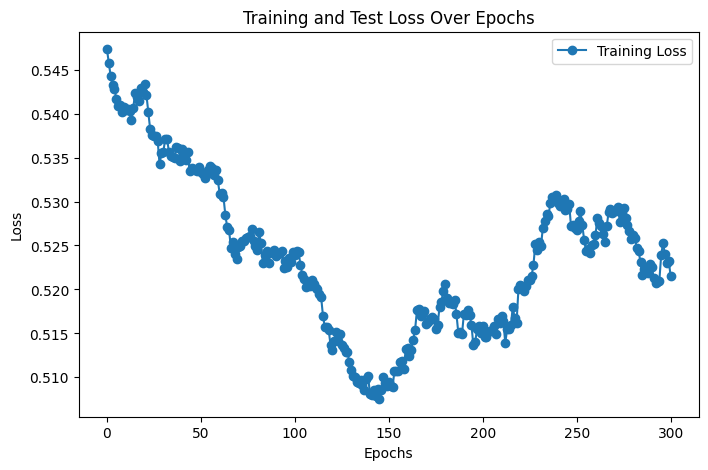

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(smoothed_train_losses, label="Training Loss", marker='o')
#plt.plot(smoothed_test_losses, label="Training Loss", marker='o')
#plt.plot(train_losses, label="Training Loss", marker='o')
#plt.plot(test_losses, label="Test Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

In [220]:
import torch

# Path to save the checkpoint
checkpoint_path = "./data/two_tower_checkpoint_1_Feb_A.pth"

# Save function
def save_checkpoint(model, optimizer, epoch, loss):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at epoch {epoch} with loss {loss:.4f}")

# Example usage (assuming you’re at epoch 5 with some loss value)
save_checkpoint(model, optimizer, epoch=20, loss=0.5192)


Checkpoint saved at epoch 20 with loss 0.5192


# Model Save/Load

In [18]:
import torch

# Load function
def load_checkpoint(model, optimizer, checkpoint_path):
    # Load the saved checkpoint
    checkpoint = torch.load(checkpoint_path)
    
    # Restore model and optimizer states
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    
    # Retrieve metadata from the checkpoint
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    
    print(f"Checkpoint loaded from epoch {epoch} with loss {loss:.4f}")
    return model, optimizer, epoch, loss

# Example usage
#model = TwoTowerRecommender(customer_input_dim=13, article_input_dim=544, embedding_dim=32)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

# Load the checkpoint
model, optimizer, epoch, loss = load_checkpoint(model, optimizer, "./data/two_tower_checkpoint_1_Feb_A.pth")

# Set model to evaluation or training mode depending on the task
#model.eval()  # or model.train() if resuming training


Checkpoint loaded from epoch 20 with loss 0.5192


In [19]:
model

TwoTowerRecommender(
  (customer_tower): Sequential(
    (0): Linear(in_features=13, out_features=254, bias=True)
    (1): ReLU()
    (2): Linear(in_features=254, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=32, bias=True)
  )
  (article_tower): Sequential(
    (0): Linear(in_features=544, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=32, bias=True)
  )
)

# TTSN KNN inference

In [20]:
model

TwoTowerRecommender(
  (customer_tower): Sequential(
    (0): Linear(in_features=13, out_features=254, bias=True)
    (1): ReLU()
    (2): Linear(in_features=254, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=32, bias=True)
  )
  (article_tower): Sequential(
    (0): Linear(in_features=544, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=32, bias=True)
  )
)

In [21]:
import pandas as pd
import os
os.listdir('./data')

['customers.csv',
 '.DS_Store',
 'two_tower_checkpoint_1_Feb_A.pth',
 'images',
 'articles.csv',
 'transactions_train.csv',
 'full_training_labels.csv',
 'sample_submission.csv']

In [22]:
submission = pd.read_csv("./data/sample_submission.csv")

In [23]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3,age
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,True,False,True,False,True,False,False,False,True,False,False,False,0.49
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,True,False,True,False,True,False,False,False,True,False,False,False,0.25
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,True,False,True,False,True,False,False,False,True,False,False,False,0.24
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,True,False,True,False,True,False,False,False,True,False,False,False,0.54
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,False,True,False,True,True,False,False,False,False,True,False,False,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,True,False,True,False,True,False,False,False,True,False,False,False,0.24
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,True,False,True,False,True,False,False,False,True,False,False,False,0.21
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,False,True,False,True,True,False,False,False,False,True,False,False,0.21


In [24]:
articles_categorical

,product_type_no_-1,product_type_no_49,product_type_no_57,product_type_no_59,product_type_no_60,product_type_no_66,product_type_no_67,product_type_no_68,product_type_no_69,product_type_no_70,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108775044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108775051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110065001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
110065002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953450001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
953763001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
956217002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
submission_uniques = set(list(submission.customer_id))

In [26]:
with_features_uniques = set(list(customers_encoded.index))

In [27]:
intersect_user = set()
for u in submission_uniques:
    if u in with_features_uniques:
        intersect_user.add(u)
len(intersect_user), len(submission_uniques)
    

(1371980, 1371980)

In [28]:
model.eval()

# Choose device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

TwoTowerRecommender(
  (customer_tower): Sequential(
    (0): Linear(in_features=13, out_features=254, bias=True)
    (1): ReLU()
    (2): Linear(in_features=254, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=32, bias=True)
  )
  (article_tower): Sequential(
    (0): Linear(in_features=544, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=32, bias=True)
  )
)

In [29]:
customer_features_tensor = torch.tensor(customer_training_data_preparation(customers_encoded).values, dtype=torch.float32).to(device)

In [30]:
model.customer_tower

Sequential(
  (0): Linear(in_features=13, out_features=254, bias=True)
  (1): ReLU()
  (2): Linear(in_features=254, out_features=254, bias=True)
  (3): ReLU()
  (4): Linear(in_features=254, out_features=32, bias=True)
)

In [31]:
with torch.no_grad():
    # Pass the customer features through the customer tower.
    user_embeddings = model.customer_tower(customer_features_tensor).cpu().numpy()


In [32]:
user_embeddings

array([[-0.85064954,  0.31157956, -0.8300066 , ...,  0.2639706 ,
        -0.4330371 , -0.40653935],
       [-0.89938474,  0.3308437 , -0.8923209 , ...,  0.31257948,
        -0.48788214, -0.4512458 ],
       [-0.90183145,  0.33186796, -0.8954547 , ...,  0.31488574,
        -0.49053437, -0.45337144],
       ...,
       [-1.124307  ,  0.45182127, -0.9012944 , ..., -0.04307365,
        -0.5136422 , -0.3285176 ],
       [-1.1330011 ,  0.4547561 , -0.91250473, ..., -0.03712555,
        -0.52018505, -0.3339882 ],
       [-0.67588615,  0.24325137, -0.657035  , ...,  0.23697528,
        -0.32734242, -0.30164382]], shape=(1371980, 32), dtype=float32)

In [33]:
import numpy as np
user_norms = np.linalg.norm(user_embeddings, axis=1, keepdims=True)
user_embeddings_norm = user_embeddings / user_norms

In [34]:
user_embeddings_norm

array([[-0.3090014 ,  0.11318235, -0.30150276, ...,  0.09588824,
        -0.15730223, -0.14767683],
       [-0.2983572 ,  0.10975236, -0.29601386, ...,  0.10369349,
        -0.16184747, -0.14969394],
       [-0.2978915 ,  0.10962208, -0.29578513, ...,  0.10401254,
        -0.16203251, -0.14975691],
       ...,
       [-0.36317998,  0.14594986, -0.29114118, ..., -0.01391389,
        -0.16591959, -0.1061196 ],
       [-0.36146504,  0.14508232, -0.29111937, ..., -0.01184428,
        -0.16595635, -0.10655335],
       [-0.31034404,  0.11169279, -0.30168822, ...,  0.10881102,
        -0.15030456, -0.13850462]], shape=(1371980, 32), dtype=float32)

In [37]:
user_embeddings_norm.shape[1]

32

In [43]:
customer_ids = customers_encoded.index.to_numpy()

In [44]:
import numpy as np

# Assume these are your computed embeddings and user IDs:
# user_embeddings: shape (num_users, embedding_dim), dtype=float32
# user_ids: a NumPy array (or list) with the corresponding user IDs

# Save both arrays in a single compressed file.
np.savez("./data/customer_embeddings.npz", customer_ids=customer_ids, customer_embeddings=user_embeddings_norm)


In [35]:
article_features_tensor = torch.tensor(article_training_data_preparation(articles_categorical).values, dtype=torch.float32).to(device)

with torch.no_grad():
    # Pass the article features through the article tower.
    article_embeddings = model.article_tower(article_features_tensor).cpu().numpy()
    
# Optionally, normalize the embeddings for cosine similarity.
article_norms = np.linalg.norm(article_embeddings, axis=1, keepdims=True)
article_embeddings_norm = article_embeddings / article_norms

In [36]:
article_embeddings_norm

array([[-0.36891812,  0.24483952, -0.29774725, ...,  0.04456037,
        -0.12046511, -0.13389552],
       [-0.36891812,  0.24483952, -0.29774725, ...,  0.04456037,
        -0.12046511, -0.13389552],
       [-0.37447694,  0.26960835, -0.31746832, ...,  0.03273991,
        -0.0709398 , -0.10418003],
       ...,
       [-0.28365773,  0.26439938, -0.19779333, ..., -0.12383389,
        -0.02610125, -0.0189227 ],
       [-0.12732163,  0.1491909 , -0.1390557 , ..., -0.13230626,
         0.07885028,  0.04837248],
       [-0.28365773,  0.26439938, -0.19779333, ..., -0.12383389,
        -0.02610125, -0.0189227 ]], shape=(105542, 32), dtype=float32)

In [45]:
articles_categorical.index.to_numpy()

array([108775015, 108775044, 108775051, ..., 956217002, 957375001,
       959461001], shape=(105542,))

In [46]:
article_ids = articles_categorical.index.to_numpy()

In [47]:
np.savez("./data/article_embeddings.npz", article_ids=article_ids, article_embeddings=article_embeddings_norm)

In [35]:
np.dot(user_embeddings_norm[0], article_embeddings_norm.T)

array([ 0.9496318 ,  0.9496318 ,  0.83290476, ...,  0.3046106 ,
       -0.12626183,  0.3046106 ], shape=(105542,), dtype=float32)

In [36]:
similarities = np.dot(user_embeddings_norm[0], article_embeddings_norm.T)

In [37]:
np.argpartition(-similarities, kth=12)

array([ 95844,  61602,  95843, ...,     11, 105540,  52770],
      shape=(105542,))

In [38]:
articles_categorical.reset_index().iloc[95844].article_id

np.int64(868063004)

In [39]:
import faiss
import numpy as np
import pandas as pd

# Assume your user and article embeddings are already normalized
# user_embeddings_norm: (num_users, embedding_dim)
# article_embeddings_norm: (num_articles, embedding_dim)
# articles_categorical: original DataFrame indexed by article_id

# Reset the index to ensure article_id is accessible as a column
articles_categorical_reset = articles_categorical.reset_index()

# Prepare FAISS index
embedding_dim = article_embeddings_norm.shape[1]  # Should be 32 (or your embedding size)
index = faiss.IndexFlatIP(embedding_dim)  # Inner product index for cosine similarity
index.add(article_embeddings_norm.astype(np.float32))  # Add all article embeddings


In [40]:
article_embeddings_norm

array([[-0.36891812,  0.24483952, -0.29774725, ...,  0.04456037,
        -0.12046511, -0.13389552],
       [-0.36891812,  0.24483952, -0.29774725, ...,  0.04456037,
        -0.12046511, -0.13389552],
       [-0.37447694,  0.26960835, -0.31746832, ...,  0.03273991,
        -0.0709398 , -0.10418003],
       ...,
       [-0.28365773,  0.26439938, -0.19779333, ..., -0.12383389,
        -0.02610125, -0.0189227 ],
       [-0.12732163,  0.1491909 , -0.1390557 , ..., -0.13230626,
         0.07885028,  0.04837248],
       [-0.28365773,  0.26439938, -0.19779333, ..., -0.12383389,
        -0.02610125, -0.0189227 ]], shape=(105542, 32), dtype=float32)

In [43]:
user_embeddings_norm

array([[-0.3090014 ,  0.11318235, -0.30150276, ...,  0.09588824,
        -0.15730223, -0.14767683],
       [-0.2983572 ,  0.10975236, -0.29601386, ...,  0.10369349,
        -0.16184747, -0.14969394],
       [-0.2978915 ,  0.10962208, -0.29578513, ...,  0.10401254,
        -0.16203251, -0.14975691],
       ...,
       [-0.36317998,  0.14594986, -0.29114118, ..., -0.01391389,
        -0.16591959, -0.1061196 ],
       [-0.36146504,  0.14508232, -0.29111937, ..., -0.01184428,
        -0.16595635, -0.10655335],
       [-0.31034404,  0.11169279, -0.30168822, ...,  0.10881102,
        -0.15030456, -0.13850462]], shape=(1371980, 32), dtype=float32)

In [73]:
index

<faiss.swigfaiss.IndexFlatIP; proxy of <Swig Object of type 'faiss::IndexFlatIP *' at 0x31ba4eb50> >

In [71]:
pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:

# Top-k articles
k = 12

# Perform search for all user embeddings at once
distances, indices = index.search(user_embeddings_norm.astype(np.float32), k)

In [ ]:
import numpy as np
import faiss
import pandas as pd

# Assume these are already computed:
# - user_embeddings_norm: (num_users, embedding_dim) normalized user embeddings.
# - article_embeddings_norm: (num_articles, embedding_dim) normalized article embeddings.
# - customers_encoded: DataFrame whose index contains customer IDs in the same order as user_embeddings_norm.
# - articles_categorical: DataFrame indexed on article_id with article features.

# Reset articles_categorical index so that the article IDs become a column and rows are sequential.
articles_categorical_reset = articles_categorical.reset_index()
article_ids = articles_categorical_reset['article_id'].values

# Build the FAISS index
embedding_dim = article_embeddings_norm.shape[1]
index = faiss.IndexFlatIP(embedding_dim)  # Inner product index (works as cosine similarity if vectors are normalized)
index.add(article_embeddings_norm.astype(np.float32))

# Set the number of top articles to retrieve per user
k = 12

# Set a batch size (adjust based on available memory)
batch_size = 10000
num_users = user_embeddings_norm.shape[0]
num_batches = (num_users + batch_size - 1) // batch_size

# File to save recommendations
output_file = "recommendations_batches.csv"

# Write header to file
with open(output_file, 'w') as f:
    f.write("customer_id,recommended_articles\n")

# Process users in batches
for i in range(num_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, num_users)
    
    # Extract a batch of user embeddings
    batch_user_embeddings = user_embeddings_norm[start:end]
    
    # Perform the FAISS search for the batch (note: cast to float32)
    distances, indices = index.search(batch_user_embeddings.astype(np.float32), k)
    
    # Map indices back to actual article IDs
    recommended_article_ids = article_ids[indices]  # shape: (batch_size, k)
    
    # Get the corresponding customer IDs from customers_encoded (assumed to be in order)
    batch_customer_ids = customers_encoded.index.values[start:end]
    
    # Prepare the batch results
    batch_results = []
    for j, cust_id in enumerate(batch_customer_ids):
        # Convert the list of recommended article IDs into a comma-separated string
        recs_str = ",".join(map(str, recommended_article_ids[j].tolist()))
        batch_results.append([cust_id, recs_str])
    
    # Convert the batch results to a DataFrame and append to CSV
    df_batch = pd.DataFrame(batch_results, columns=["customer_id", "recommended_articles"])
    df_batch.to_csv(output_file, mode='a', index=False, header=False)
    
    print(f"Batch {i+1}/{num_batches} processed (users {start} to {end-1}).")

print(f"All batches processed. Recommendations saved to {output_file}")
